# Model of secondary school in 2019

This Notebook is divided into three parts. 
* Part A: Feature selection to run the models accordingly to Logistic Regression assumptions.Then, we will run our first Models.
* Part B: We will add the 'actionable' features that were not adequate in Part A, and which we consider important.
* Part C: Do Train/ Test and MAPE metrcis to compare the models. Perform some outliers detection to improve performance.

In [1]:
# Scientific libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# model libraries 
from scipy.stats import chi2_contingency, norm
from scipy.stats import chi2_contingency, ttest_ind
import researchpy as rp
import scipy.stats as stats
# Model runners
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence

# Metrics options
from sklearn.metrics import roc_curve, auc

# Plotlib options
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)
# Pandas options
pd.options.display.max_columns = None

In [2]:
# Dictionary with the purpose of reducing memory size when loading the dataset.
dict_tipos = {
# SIMAT
'ANO_INF':              'uint16',
'CODIGO_DANE':          'uint64',
'CODIGO_DANE_SEDE':     'uint64',
'TIPO_DOCUMENTO':       'uint8',
'NRO_DOCUMENTO':        'string',
'DIRECCION_RESIDENCIA': 'string',
'RES_DEPTO':            'uint8',
'RES_MUN':              'uint16',
'ESTRATO':              'uint8',
'SISBEN':               'float16',
'GENERO':               'uint8',
'POB_VICT_CONF':        'uint8',
'PROVIENE_SECTOR_PRIV': 'uint8',
'PROVIENE_OTR_MUN':     'uint8',
'TIPO_DISCAPACIDAD':    'uint8',
'CAP_EXC':              'uint8',
'CODIGO_ETNIA':         'uint16',
'CODIGO_JORNADA':       'uint8',
'CARACTER':             'uint8',
'CODIGO_ESPECIALIDAD':  'uint8',
'CODIGO_GRADO':         'int8',
'CODIGO_METODOLOGIA':   'uint8',
'REPITENTE':            'uint8',
'SIT_ACAD_ANIO_ANT':    'uint8',
'CON_ALUM_ANIO_ANT':    'uint8',
'ZONA_RESI_ALU':        'uint8',
'EDAD':                 'uint8',
'NIVEL':                'uint8',
'DIR_NUM_LOCALIDAD':    'uint8',
'NIVEL_SISBEN':         'uint8',
'GRADO_OVERAGE':        'uint8',
'OVERAGE':              'uint8',
# SISBEN
'ficha':                'int64',
'comuna':               'uint8',
'barrio':               'uint32',
'nombarrio':            'string',
'direcc':               'string',
'vereda':               'uint8',
'nomvereda':            'string',
'vivienda':             'uint8',
'pared':                'uint8',
'piso':                 'uint8',
'energia':              'uint8',
'alcanta':              'uint8',
'gas':                  'uint8',
'telefono' :            'uint8',
'basura' :              'uint8',
'acueduc' :             'uint8',
'estrato' :             'uint8',
'elimbasura' :          'uint8',
'tcuartosvi' :          'uint8',
'thogar' :              'uint8',
'recolec' :             'uint8',
'tipdir' :              'uint8',
'verifica' :            'uint8',
'hogar' :               'uint8',
'teneviv' :             'uint8',
'tcuartos' :            'uint8',
'tdormir' :             'uint8',
'sanitar' :             'uint8',
'usanitar' :            'uint8',
'usosani' :             'uint8',
'tsanitar' :            'uint8',
'ducha' :               'uint8',
'agua' :                'uint8',
'llega' :               'uint8',
'cuandi' :              'uint8',
'suminis' :             'uint8',
'cuanhoras' :           'uint8',
'preparan' :            'uint8',
'cocina' :              'uint8',
'cocinan' :             'uint8',
'alumbra' :             'uint8',
'usotele' :             'uint8',
'nevera' :              'uint8',
'lavadora' :            'uint8',
'tvcolor' :             'uint8',
'tvcable' :             'uint8',
'calenta' :             'uint8',
'horno' :               'uint8',
'aire' :                'uint8',
'computador' :          'uint8',
'equipo' :              'uint8',
'moto' :                'uint8',
'tractor' :             'uint8',
'tiene_auto' :          'uint8',
'bieraices':            'uint8',
'tpersona' :            'uint8',
'informan' :            'uint8',
'orden' :               'uint8',
'nucleo' :              'uint8',
'parentes' :            'uint8',
'tipodoc' :             'uint8',
'documen':              'string',
'sexo' :                'uint8',
'estcivil' :            'uint8',
'discapa' :             'uint8',
'carnet' :              'uint8',
'asiste' :              'uint8',
'tipoesta' :            'uint8',
'grado' :               'uint8',
'nivel' :               'uint8',
'activi' :              'uint8',
'buscando' :            'uint8',
'ingresos':             'int64',
'edad':                 'uint8',
'conyuvive':            'uint8',
'hijosde':              'int8',
'embaraza' :            'uint8',
'extranjero' :          'uint8',
'pagapor' :             'uint8',
'percibe' :             'uint8',
'serdomes' :            'uint8',
'unigasto' :            'uint8',
'area' :                'uint8',
'nparentes':            'uint8',
'puntaje_sisben_3':     'float32',
'todos_servicios_Pub':  'uint8',
'indice_hacinamiento':  'float16',
# C-600  
'ES_BILIGUE':           'int8',
'TOTAL_DOCENTES':       'uint16',
'TOTAL_ALUMNOS':        'uint16',
'TOTAL_EQUIPO_COMPUTO': 'uint16',
'TOTAL_DOCENTES_CON_TITULO':'uint8',
# ICFES
'num_presentaron_ICFES': 'uint8'
  }


In [3]:
df = pd.read_csv('../data/3-oro/Merge_2019_ICFES_C600.csv' , index_col=0, dtype = dict_tipos)

In [4]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467110 entries, 0 to 467109
Columns: 130 entries, ANO_INF to num_presentaron_ICFES
dtypes: float16(2), float32(1), float64(4), int64(3), int8(2), object(2), string(5), uint16(6), uint32(1), uint64(2), uint8(102)
memory usage: 117.6+ MB


In [5]:
df.head(1)

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,EDAD,NIVEL,DIR_NUM_LOCALIDAD,NIVEL_SISBEN,GRADO_OVERAGE,OVERAGE,ficha,comuna,barrio,nombarrio,direcc,vereda,nomvereda,vivienda,pared,piso,energia,alcanta,gas,telefono,basura,acueduc,estrato,elimbasura,tcuartosvi,thogar,recolec,tipdir,verifica,hogar,teneviv,tcuartos,tdormir,sanitar,usanitar,usosani,tsanitar,ducha,agua,llega,cuandi,suminis,cuanhoras,preparan,cocina,cocinan,alumbra,usotele,nevera,lavadora,tvcolor,tvcable,calenta,horno,aire,computador,equipo,moto,tractor,tiene_auto,bieraices,tpersona,informan,orden,nucleo,parentes,tipodoc,sexo,estcivil,discapa,carnet,asiste,tipoesta,grado,nivel,activi,buscando,ingresos,edad,conyuvive,hijosde,embaraza,extranjero,pagapor,percibe,serdomes,unigasto,area,nparentes,puntaje_sisben_3,nivel_hacinamiento,todos_servicios_Pub,indice_hacinamiento,ES_BILINGUE,TOTAL_DOCENTES,TOTAL_ALUMNOS,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,num_presentaron_ICFES
0,2019,111001000078,111001000078,5,1000003730,CR 51 D # 35 SUR - 45,11,1,3,43.0,2002-04-23,0,99,0,0,0,9,0,6,1,5,11,1,0,1,9,1,16,4,16,1,100,0,4385957,16,4407,ALCALA,CL 36 SUR 51 04 PI 2 AP 202,0,BARRIO ZONA URBANA,1,1,2,1,1,1,1,1,1,3,1,3,1,3,1,1,1,1,3,2,1,1,1,1,1,1,1,0,1,0,1,1,2,1,1,1,0,1,1,2,2,2,0,1,0,0,0,2,5,2,3,2,4,2,0,5,0,3,1,5,3,1,3,0,0,9,0,2,0,0,0,0,0,1,1,3,43.919998,Hacinamiento_medio,1,2.5,0,29,561,319,19.344828,0.568627,28,0.965517,265.478873,71


In [6]:
df["POB_VICT_CONF"].value_counts()

99    450622
1      14998
9        950
3        247
2        109
4        101
10        74
20         5
17         2
6          1
18         1
Name: POB_VICT_CONF, dtype: int64

In [7]:
dict_vict_recod = {
    99: 0,
    1: 1, 
    10: 1,
    3: 1,
    9: 1,
    4: 1,
    2: 1,
    18: 1,
    17: 1,
    7: 1,
    20: 1,
    6: 1,
    12: 1,
    15: 1,
    8: 1,
    13: 1,
    21: 1
}

In [8]:
df['POB_VICT_CONF'] = df['POB_VICT_CONF'].replace(dict_vict_recod)

In [9]:
df['GRADO_OVERAGE'] = (-1)*df['GRADO_OVERAGE'] + 100

In [10]:
df.head(1)

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,EDAD,NIVEL,DIR_NUM_LOCALIDAD,NIVEL_SISBEN,GRADO_OVERAGE,OVERAGE,ficha,comuna,barrio,nombarrio,direcc,vereda,nomvereda,vivienda,pared,piso,energia,alcanta,gas,telefono,basura,acueduc,estrato,elimbasura,tcuartosvi,thogar,recolec,tipdir,verifica,hogar,teneviv,tcuartos,tdormir,sanitar,usanitar,usosani,tsanitar,ducha,agua,llega,cuandi,suminis,cuanhoras,preparan,cocina,cocinan,alumbra,usotele,nevera,lavadora,tvcolor,tvcable,calenta,horno,aire,computador,equipo,moto,tractor,tiene_auto,bieraices,tpersona,informan,orden,nucleo,parentes,tipodoc,sexo,estcivil,discapa,carnet,asiste,tipoesta,grado,nivel,activi,buscando,ingresos,edad,conyuvive,hijosde,embaraza,extranjero,pagapor,percibe,serdomes,unigasto,area,nparentes,puntaje_sisben_3,nivel_hacinamiento,todos_servicios_Pub,indice_hacinamiento,ES_BILINGUE,TOTAL_DOCENTES,TOTAL_ALUMNOS,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,num_presentaron_ICFES
0,2019,111001000078,111001000078,5,1000003730,CR 51 D # 35 SUR - 45,11,1,3,43.0,2002-04-23,0,0,0,0,0,9,0,6,1,5,11,1,0,1,9,1,16,4,16,1,0,0,4385957,16,4407,ALCALA,CL 36 SUR 51 04 PI 2 AP 202,0,BARRIO ZONA URBANA,1,1,2,1,1,1,1,1,1,3,1,3,1,3,1,1,1,1,3,2,1,1,1,1,1,1,1,0,1,0,1,1,2,1,1,1,0,1,1,2,2,2,0,1,0,0,0,2,5,2,3,2,4,2,0,5,0,3,1,5,3,1,3,0,0,9,0,2,0,0,0,0,0,1,1,3,43.919998,Hacinamiento_medio,1,2.5,0,29,561,319,19.344828,0.568627,28,0.965517,265.478873,71


## Initial Variables

In [11]:
variables = ['EDAD',
             'estrato',
             'puntaje_sisben_3',
             'indice_hacinamiento', #-> solo si no se pone nivel_hacinamiento en Categoria
             'TOTAL_EQUIPO_COMPUTO',
             'ALUMN_POR_DOCENTE',
             'COMPU_POR_ALUMN',
             'TOTAL_DOCENTES_CON_TITULO',
             'PROP_DOCENTES_CON_TITULO', #-> solo si no se incluye TOTAL_DOCENTES_CON_TITULO y TOTAL_ALUM al tiempo
             'promepuntaje',
             'GRADO_OVERAGE',
             #'TOTAL_DOCENTES',
             #'TOTAL_ALUMNOS',
             'nparentes',
             #'tcuartosvi',
             'tpersona'
            ]

categorias= ['GENERO',
             'POB_VICT_CONF',
             'PROVIENE_OTR_MUN',
             'TIPO_DISCAPACIDAD',
             'CODIGO_ETNIA',
             'CODIGO_JORNADA',
             'DIR_NUM_LOCALIDAD',
             'embaraza',
             'todos_servicios_Pub',
             'teneviv',
             'computador',
             'tiene_auto',
             'ES_BILINGUE',
             'CAP_EXC',
             

             ]

# Part A: Feature Selection

## Filter by grade Level and Methodology

In [12]:
df['NIVEL'].value_counts()/df['NIVEL'].shape[0]

2    0.423956
3    0.383991
4    0.136013
1    0.056040
Name: NIVEL, dtype: float64

In [13]:
df = df[(df['NIVEL']== 3)]

In [14]:
df['CODIGO_METODOLOGIA'].value_counts()/df['CODIGO_METODOLOGIA'].shape[0]

1    1.0
Name: CODIGO_METODOLOGIA, dtype: float64

In [15]:
df = df[(df['CODIGO_METODOLOGIA']==1)]

In [16]:
df['REPITENTE'].value_counts()/(df.shape[0])

0    0.94572
1    0.05428
Name: REPITENTE, dtype: float64

In [17]:
df['REPITENTE'].value_counts()

0    169630
1      9736
Name: REPITENTE, dtype: int64

-----------

# Univariate Feature Selection for categorical data
## Pearson Chi-Squared Test For independence
### Part I: Features with dependence against REPITENTE

$$ H_{0} : The \: variables \: are \: Independent$$
$$ H_{a}: The \: variables \:are \: not \: Independent $$

#### References:
1. [Why Chi Test?](https://towardsdatascience.com/mistakes-in-applying-univariate-feature-selection-methods-34c43ce8b93d)
2. [Why we implemented it in this way?](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)

In [18]:
chi2_values_df = pd.DataFrame(columns = ['Category', 'p-value'])
cat_dep = []
p_values = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p <= 0.05:
        cat_dep.append(i)
        p_values.append(p)
print('Dependent variables that reject H0 at a significance level of 5%')
chi2_values_df['Category'] = cat_dep
chi2_values_df['p-value'] = p_values
print(chi2_values_df.sort_values(by = 'p-value'))
    

Dependent variables that reject H0 at a significance level of 5%
              Category        p-value
4    DIR_NUM_LOCALIDAD  7.852397e-250
0               GENERO   1.938728e-40
3       CODIGO_JORNADA   1.499189e-31
6              teneviv   4.278191e-15
7           computador   4.675489e-10
9          ES_BILINGUE   1.929269e-09
5  todos_servicios_Pub   2.214557e-05
8           tiene_auto   2.589029e-05
1        POB_VICT_CONF   2.707600e-04
2    TIPO_DISCAPACIDAD   1.532998e-02


In [19]:
categorias = cat_dep

In [20]:
rejected = pd.DataFrame(columns = ['Category', 'p-value'])
cat_nodep = []
p_valuesr = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p > 0.05:
        cat_nodep.append(i)
        p_valuesr.append(p)
print('Variables that fail to reject H0 (independent) at a significance level of 5%')
rejected['Category'] = cat_nodep
rejected['p-value'] = p_valuesr
print(rejected.sort_values(by = 'p-value', ascending = False))

Variables that fail to reject H0 (independent) at a significance level of 5%
Empty DataFrame
Columns: [Category, p-value]
Index: []


--------

### Part II: Feature selection for continuous variables
We could perform an ANOVA F-test to do this feature selection. Since we have very few continous data, and other assumptions need to be checked we skip this step for now.

## Model: Logistic Regression
### Assumptions:
1. Right response variable. This is obvious since REPITENTE is boolean.
2. Linearility of continuous variables agaisnt log(odds) = $ln(\dfrac{p}{1-p})$
3. Not strongly influential Outliers.
4. Absence of Multicollinearity
5. Independence of observations

[Reference](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290)

## Assumptions checks 

## Number II: Linearility versus log (odds) - Box- Tidwell Test

The intituion behind this test is very clear. We are trying to test if the probability of seeing a success (occurence of a 1 value) is exponentially related to our variables. In other words, we expect that:
   $$ Y = ln(\dfrac{p}{1-p}) \approx \beta_{0} + \sum_{i=1}^{n}x_{i}\beta_{i} $$
Where p is the probability of a success, i.e. the number of positive outcomes divided by the total of observations in a given sample of the population.



#### Box Tidwell Test
First we perform a standard Logistic regression over alla variables to capture the differences.

In [21]:
y = df['REPITENTE']
y.shape

(179366,)

In [22]:
X = df[variables]
X.shape

(179366, 13)

In [23]:
# 0 and 1 are interchangable since in either case value*ln(value) = 0
X.replace({0: 1, 0.0 : 1.0}, inplace = True)

C:\Users\diego\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


When running a Logistic regression it is good practice to add a column of ones. See this [reference](https://stats.stackexchange.com/questions/440242/statsmodels-logistic-regression-adding-intercept) for a nice explanation of why.

In [24]:
X_cons = sm.add_constant(X, prepend=False)

In [25]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               179366
Model:                            GLM   Df Residuals:                   179352
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35830.
Date:                Wed, 06 Jul 2022   Deviance:                       71659.
Time:                        23:58:59   Pearson chi2:                 1.72e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
EDAD                          0.1259      0.008     15.500      0.000       0.110       0.142
estrato                       0.1063      0.018      5.892      0.000       0.071       0.142
puntaje_sisben_3             -0.0032      0.001     -4.257      0.000      -0.005      -0.002
indice_hacinamiento           0.0145      0.009      1.537      0.124      -0.004       0.033
TOTAL_EQUIPO_COMPUTO          0.0006   8.02e-05      7.745      0.000       0.000       0.001
ALUMN_POR_DOCENTE             0.0221      0.003      7.776      0.000       0.017       0.028
COMPU_POR_ALUMN              -0.4239      0.106     -3.993      0.000      -0.632      -0.216
TOTAL_DOCENTES_CON_TITULO    -0.0020      0.000     -5.284      0.000      -0.003      -0.001
PROP_DOCENTES_CON_TITULO     -0.4672      0.046    -10.156      0.000      -0.557      -0.377
promepuntaje                 -0.0059      0.001     -7.023      0.000      -0.008      -0.004
GRADO_OVERAGE                 0.0581      0.002     38.173      0.000       0.055       0.061
nparentes                     0.0062      0.009      0.673      0.501      -0.012       0.024
tpersona                      0.0100      0.006      1.568      0.117      -0.002       0.022
const                        -3.7733      0.248    -15.227      0.000      -4.259      -3.288
=============================================================================================
"""

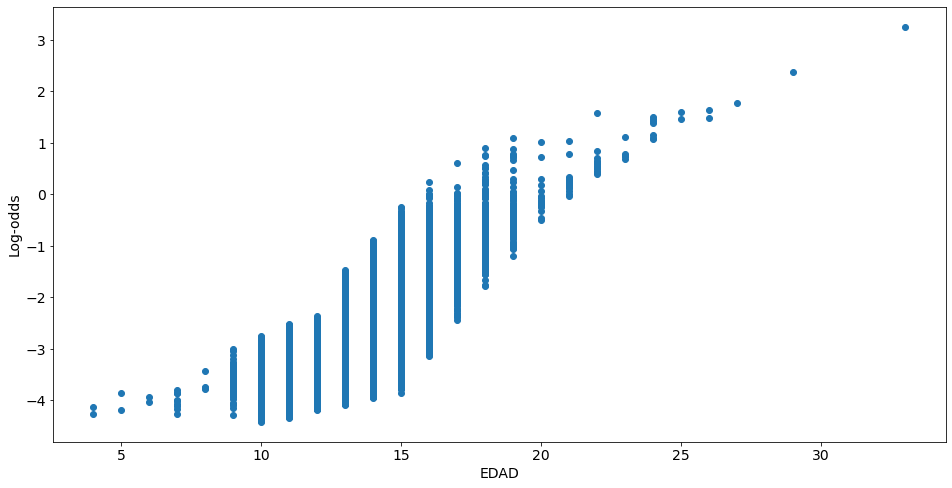

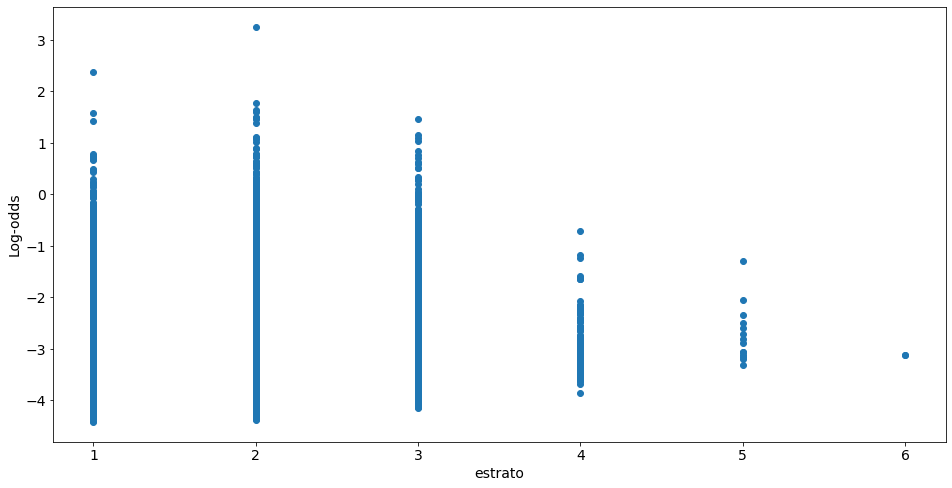

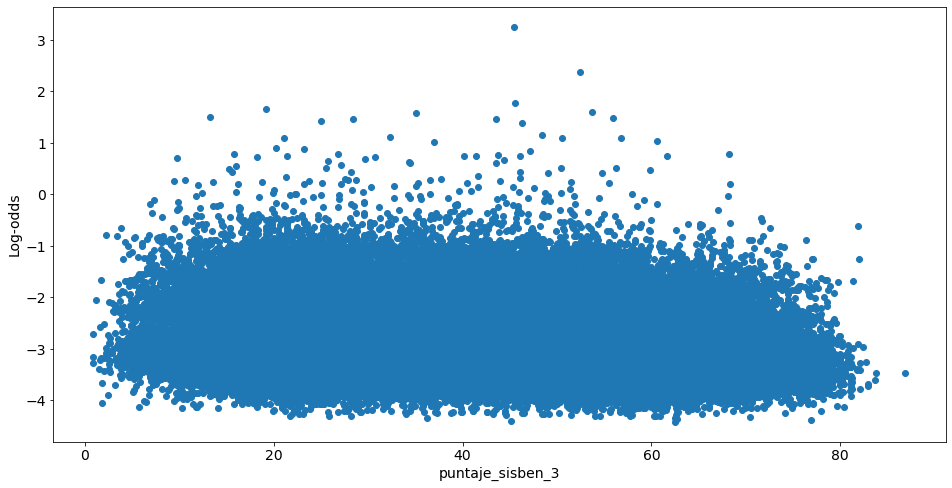

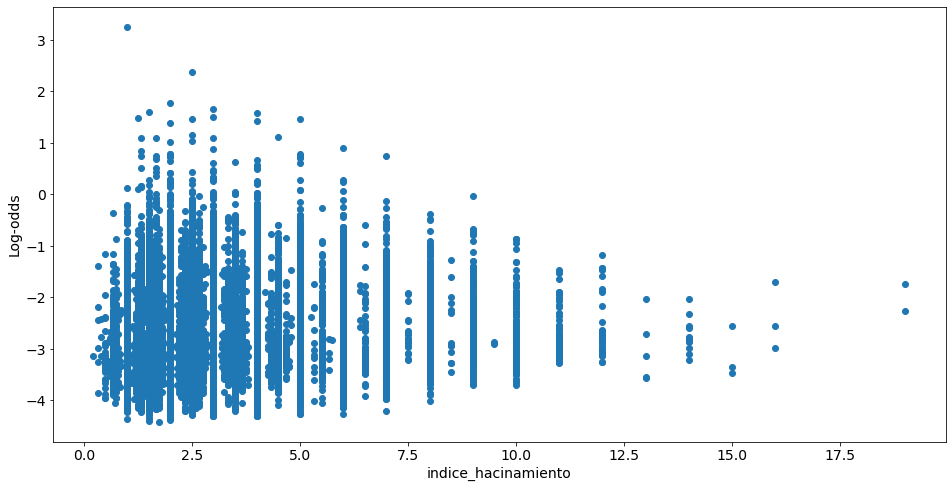

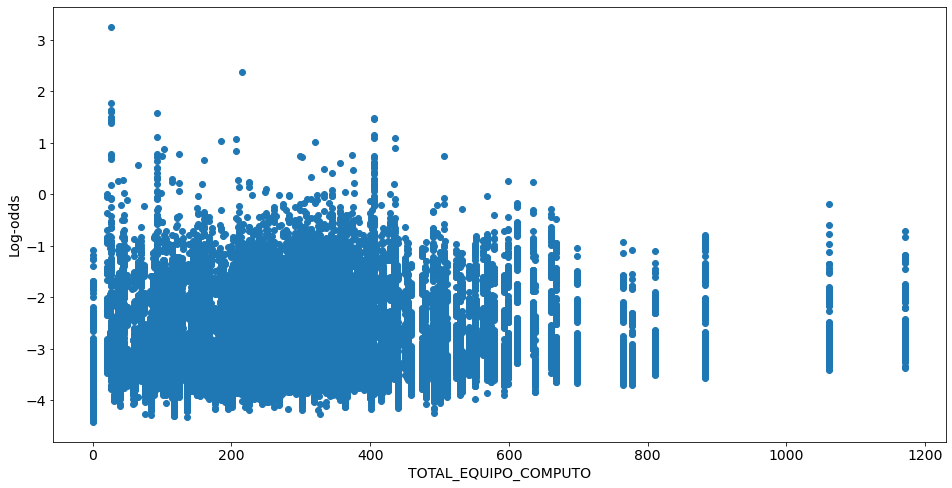

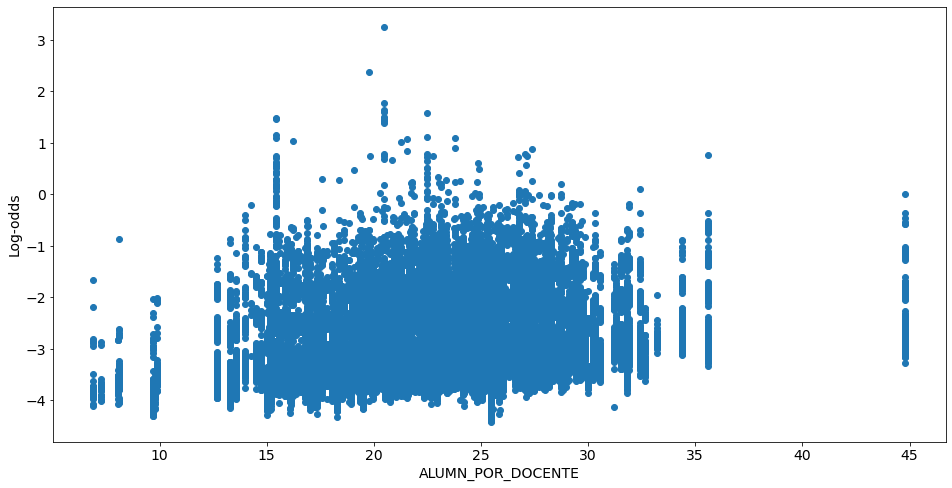

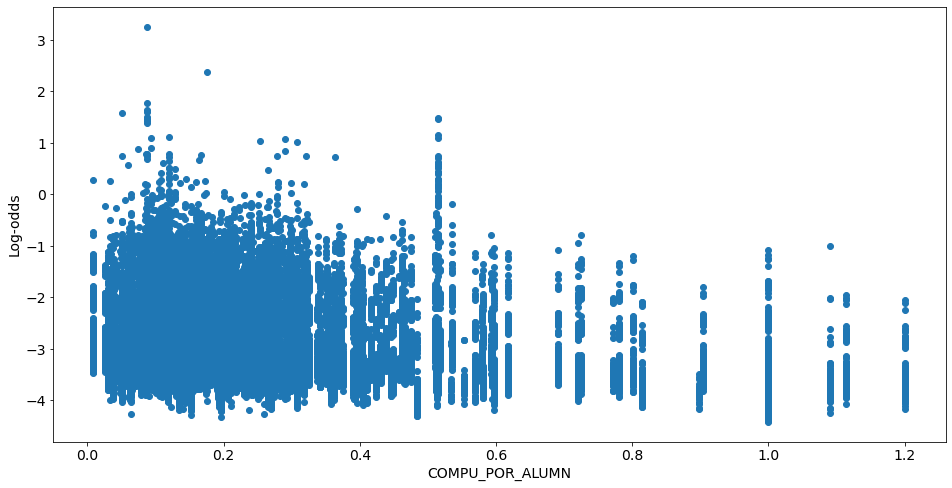

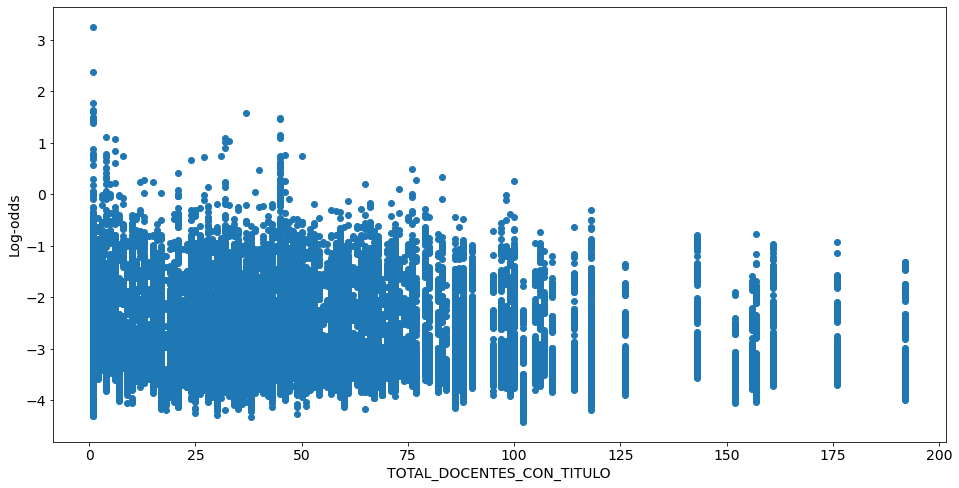

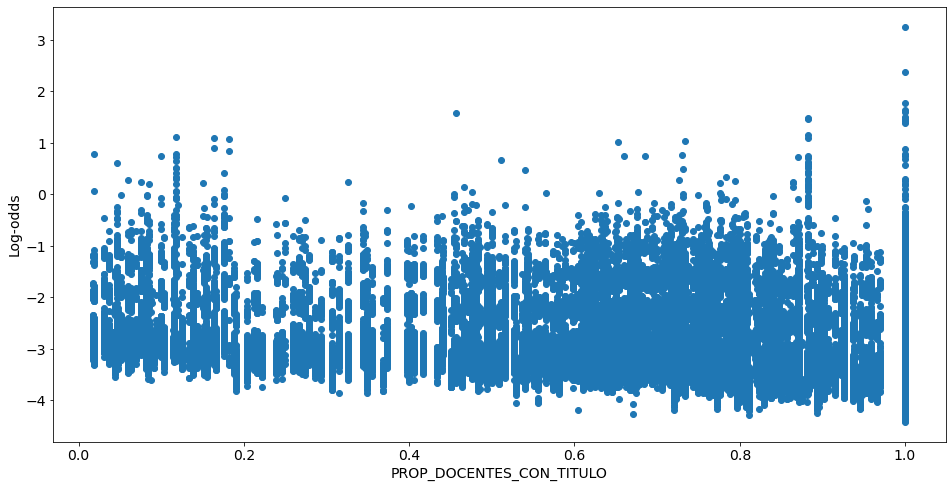

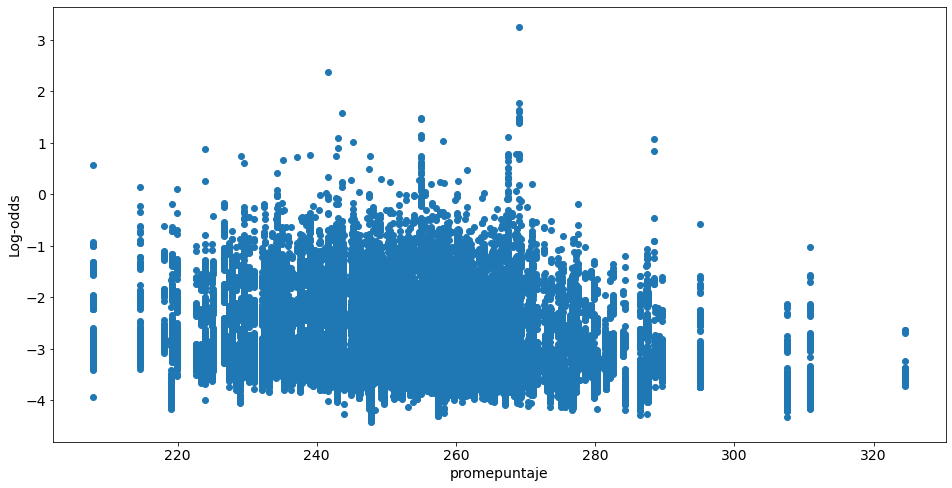

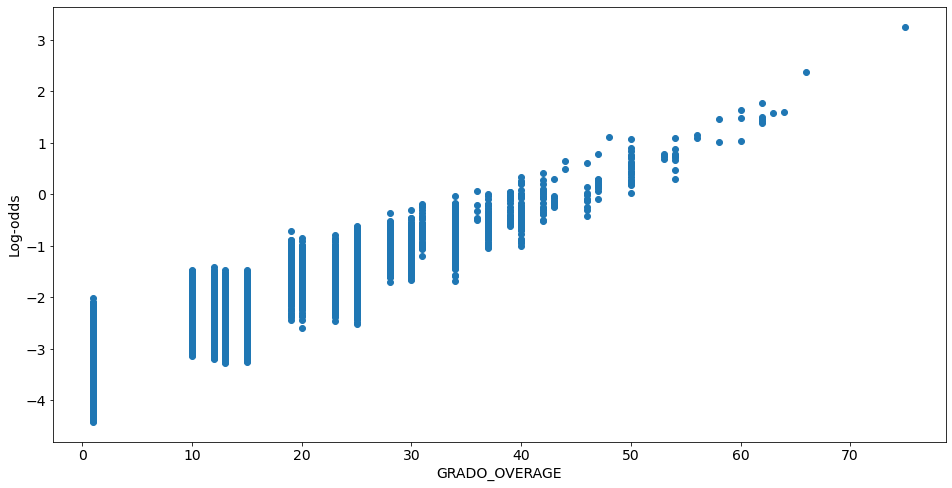

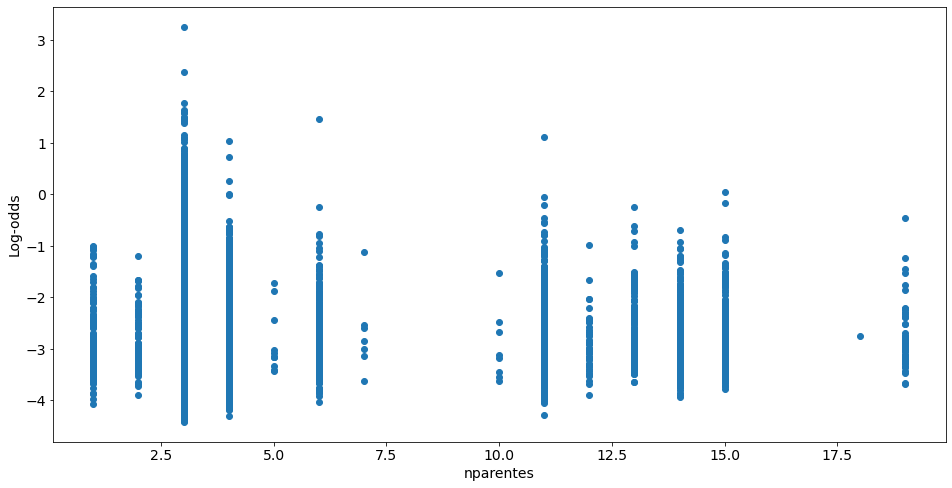

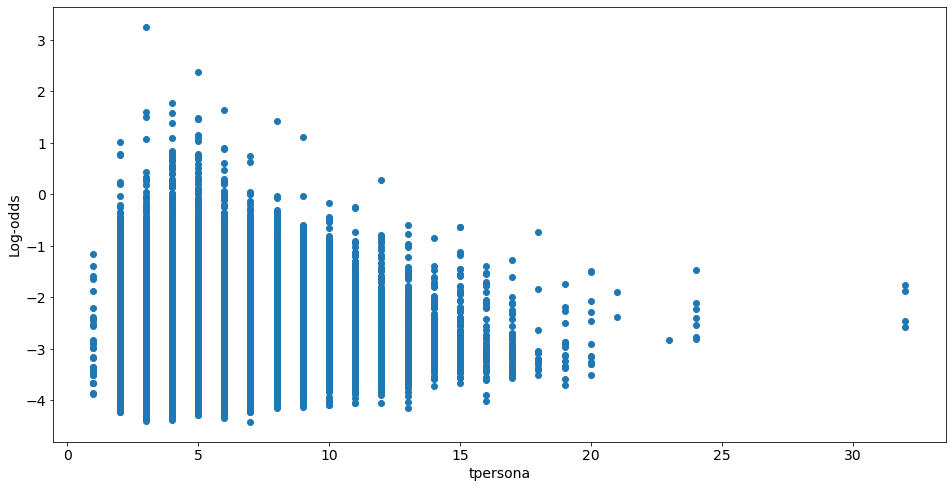

In [26]:
predicted = logit_results.predict(X_cons)

# Getting log odds values
log_odds = np.log(predicted / (1 - predicted))

# Visualize predictor variable vs logit values for Age
for var in variables:
    plt.scatter(x=X_cons[var].values, y=log_odds)
    plt.xlabel(f"{var}")
    plt.ylabel("Log-odds")
    plt.show()
    

#### Box Tidwell with the added variables

In [27]:
y = df['REPITENTE']
X = df[variables]

# 0 and 1 are interchangable since in either case value*ln(value) = 0
X.replace({0: 1, 0.0 : 1.0}, inplace = True)


for var in variables:
    X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))

C:\Users\diego\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-27-7718e828fc32>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))


In [28]:
cols_to_keep = variables + X.columns.tolist()[-len(variables):]

In [29]:
X_cons = sm.add_constant(X, prepend=False)

In [30]:
## Should not print anything, otherwise an error will raise in the test
for col in X_cons:
    if np.isinf(X_cons[col]).values.sum() > 0:
        print(col)

In [31]:
## Should not print anything, otherwise an error will raise in the next cell
for col in X_cons:
    if np.isnan(X_cons[col]).values.sum() > 0:
        print(col, np.isnan(X_cons[col]).values.sum())

In [32]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               179366
Model:                            GLM   Df Residuals:                   179339
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35280.
Date:                Wed, 06 Jul 2022   Deviance:                       70560.
Time:                        23:59:13   Pearson chi2:                 2.87e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
EDAD                                                        6.0718      0.356     17.046      0.000       5.374       6.770
estrato                                                     0.7765      0.139      5.587      0.000       0.504       1.049
puntaje_sisben_3                                            0.0176      0.014      1.292      0.197      -0.009       0.044
indice_hacinamiento                                         0.0212      0.061      0.346      0.730      -0.099       0.141
TOTAL_EQUIPO_COMPUTO                                        0.0159      0.001     11.084      0.000       0.013       0.019
ALUMN_POR_DOCENTE                                           0.0441      0.069      0.638      0.524      -0.091       0.180
COMPU_POR_ALUMN                                            -0.7441      0.123     -6.031      0.000      -0.986      -0.502
TOTAL_DOCENTES_CON_TITULO                                  -0.0282      0.004     -7.372      0.000      -0.036      -0.021
PROP_DOCENTES_CON_TITULO                                    0.3418      0.079      4.315      0.000       0.187       0.497
promepuntaje                                                0.3565      0.127      2.799      0.005       0.107       0.606
GRADO_OVERAGE                                               0.2048      0.011     18.798      0.000       0.183       0.226
nparentes                                                   0.1641      0.130      1.260      0.208      -0.091       0.419
tpersona                                                    0.0059      0.053      0.111      0.912      -0.098       0.110
EDAD:Log_EDAD                                              -1.6527      0.099    -16.748      0.000      -1.846      -1.459
estrato:Log_estrato                                        -0.3982      0.085     -4.694      0.000      -0.564      -0.232
puntaje_sisben_3:Log_puntaje_sisben_3                      -0.0044      0.003     -1.506      0.132      -0.010       0.001
indice_hacinamiento:Log_indice_hacinamiento                -0.0025      0.026     -0.096      0.923      -0.054       0.049
TOTAL_EQUIPO_COMPUTO:Log_TOTAL_EQUIPO_COMPUTO              -0.0022      0.000    -10.729      0.000      -0.003      -0.002
ALUMN_POR_DOCENTE:Log_ALUMN_POR_DOCENTE                    -0.0077      0.016     -0.468      0.640      -0.040       0.024
COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN                         0.4800      0.250      1.919      0.055      -0.010       0.970
TOTAL_DOCENTES_CON_TITULO:Log_TOTAL_DOCENTES_CON_TITULO     0.0045      0.001      6.140      0.000       0.003       0.006
PROP_DOCENTES_CON_TITULO:Log_PROP_DOCENTES_CON_TITULO      -2.4685      0.177    -13.910      0.000      -2

In [33]:
logit_results.pvalues[logit_results.pvalues > 0.05]

puntaje_sisben_3                               0.196503
indice_hacinamiento                            0.729555
ALUMN_POR_DOCENTE                              0.523501
nparentes                                      0.207516
tpersona                                       0.911828
puntaje_sisben_3:Log_puntaje_sisben_3          0.132160
indice_hacinamiento:Log_indice_hacinamiento    0.923318
ALUMN_POR_DOCENTE:Log_ALUMN_POR_DOCENTE        0.639722
COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN            0.054957
nparentes:Log_nparentes                        0.228757
tpersona:Log_tpersona                          0.975570
dtype: float64

In [34]:
logit_results.pvalues[logit_results.pvalues > 0.05].index

Index(['puntaje_sisben_3', 'indice_hacinamiento', 'ALUMN_POR_DOCENTE',
       'nparentes', 'tpersona', 'puntaje_sisben_3:Log_puntaje_sisben_3',
       'indice_hacinamiento:Log_indice_hacinamiento',
       'ALUMN_POR_DOCENTE:Log_ALUMN_POR_DOCENTE',
       'COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN', 'nparentes:Log_nparentes',
       'tpersona:Log_tpersona'],
      dtype='object')

In [35]:
conti = []
for x in logit_results.pvalues[logit_results.pvalues > 0.05].index:
    if ":" in x:
        aux = x.split(':')
        conti.append(aux[0])
conti

['puntaje_sisben_3',
 'indice_hacinamiento',
 'ALUMN_POR_DOCENTE',
 'COMPU_POR_ALUMN',
 'nparentes',
 'tpersona']

In [36]:
# We will set our new variables as conti after running the sme test with another numeric algorithm (Newton)
len(variables)-len(conti)

7

-------------------------

#### Comparasion against smf.logit

We can see that the results are equivalent

In [37]:
def formula_odds(dependiente, variables):
    formula = f'{dependiente} ~ '
    for variable in variables:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'{variable}'
        formula += f' + {variable} : np.log({variable})'
    return formula  

In [38]:
formula = formula_odds('REPITENTE', variables)
formula

'REPITENTE ~ EDAD + EDAD : np.log(EDAD) + estrato + estrato : np.log(estrato) + puntaje_sisben_3 + puntaje_sisben_3 : np.log(puntaje_sisben_3) + indice_hacinamiento + indice_hacinamiento : np.log(indice_hacinamiento) + TOTAL_EQUIPO_COMPUTO + TOTAL_EQUIPO_COMPUTO : np.log(TOTAL_EQUIPO_COMPUTO) + ALUMN_POR_DOCENTE + ALUMN_POR_DOCENTE : np.log(ALUMN_POR_DOCENTE) + COMPU_POR_ALUMN + COMPU_POR_ALUMN : np.log(COMPU_POR_ALUMN) + TOTAL_DOCENTES_CON_TITULO + TOTAL_DOCENTES_CON_TITULO : np.log(TOTAL_DOCENTES_CON_TITULO) + PROP_DOCENTES_CON_TITULO + PROP_DOCENTES_CON_TITULO : np.log(PROP_DOCENTES_CON_TITULO) + promepuntaje + promepuntaje : np.log(promepuntaje) + GRADO_OVERAGE + GRADO_OVERAGE : np.log(GRADO_OVERAGE) + nparentes + nparentes : np.log(nparentes) + tpersona + tpersona : np.log(tpersona)'

In [39]:
X_cons = X_cons.iloc[:,0:len(variables)]

In [40]:
X_cons['REPITENTE'] = y

In [41]:
model= smf.logit(formula=formula, data= X_cons).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.196694
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               179366
Model:                          Logit   Df Residuals:                   179339
Method:                           MLE   Df Model:                           26
Date:                Wed, 06 Jul 2022   Pseudo R-squ.:                 0.06749
Time:                        23:59:17   Log-Likelihood:                -35280.
converged:                       True   LL-Null:                       -37834.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                     -43.1376      5.137     -8.397      0.000     -53.207     -33.068
EDAD                                                            6.0718      0.356     17.046      0.000       5.374       6.770
EDAD:np.log(EDAD)                                              -1.6527      0.099    -16.748      0.000      -1.846      -1.459
estrato                                                         0.7765      0.139      5.587      0.000       0.504       1.049
estrato:np.log(estrato)                                        -0.3982      0.085     -4.694      0.000      -0.564      -0.232
puntaje_sisben_3                                                0.0176      0.014      1.292      0.197      -0.009       0.044
puntaje_sisben_3:np.log(puntaje_sisben_3)                      -0.0044      0.003     -1.506      0.132      -0.010       0.001
indice_hacinamiento                                             0.0212      0.061      0.346      0.729      -0.099       0.141
indice_hacinamiento:np.log(indice_hacinamiento)                -0.0025      0.026     -0.096      0.923      -0.054       0.049
TOTAL_EQUIPO_COMPUTO                                            0.0159      0.001     11.084      0.000       0.013       0.019
TOTAL_EQUIPO_COMPUTO:np.log(TOTAL_EQUIPO_COMPUTO)              -0.0022      0.000    -10.729      0.000      -0.003      -0.002
ALUMN_POR_DOCENTE                                               0.0441      0.069      0.638      0.524      -0.091       0.180
ALUMN_POR_DOCENTE:np.log(ALUMN_POR_DOCENTE)                    -0.0077      0.016     -0.468      0.640      -0.040       0.024
COMPU_POR_ALUMN                                                -0.7441      0.123     -6.031      0.000      -0.986      -0.502
COMPU_POR_ALUMN:np.log(COMPU_POR_ALUMN)                         0.4800      0.250      1.919      0.055      -0.010       0.970
TOTAL_DOCENTES_CON_TITULO                                      -0.0282      0.004     -7.372      0.000      -0.036      -0.021
TOTAL_DOCENTES_CON_TITULO:np.log(TOTAL_DOCENTES_CON_TITULO)     0.0045      0.001      6.140      0.000       0.003       0.006
PROP_DOCENTES_CON_TITULO                                        0.3418      0.079      4.315      0.000       0.187       0.497
PROP_DOCENTES_CON_TITULO:np.log(PROP_DOCENTES_CON_TITULO)      -2.4685      0.177    -13.910      0.000      -2.816      -2.121
promepuntaje                                                    0.3565      0.127      2.799      0.005       0.107       0.606
promepuntaje:np.log(promepuntaje)                              -0.0550      0.019     -2.823      0.005      -0.093      -0.017
GRADO_OVERAGE                                                   0.2048      0.011     18.798      0.000       0.183       0.226
GRADO_OVERAGE:np.log(GRADO_OVERAGE)      

In [42]:
model.pvalues[model.pvalues > 0.05]

puntaje_sisben_3                                   0.196510
puntaje_sisben_3:np.log(puntaje_sisben_3)          0.132165
indice_hacinamiento                                0.729415
indice_hacinamiento:np.log(indice_hacinamiento)    0.923165
ALUMN_POR_DOCENTE                                  0.523500
ALUMN_POR_DOCENTE:np.log(ALUMN_POR_DOCENTE)        0.639721
COMPU_POR_ALUMN:np.log(COMPU_POR_ALUMN)            0.054956
nparentes                                          0.207514
nparentes:np.log(nparentes)                        0.228755
tpersona                                           0.911857
tpersona:np.log(tpersona)                          0.975598
dtype: float64

In [43]:
conti2 = []
for x in model.pvalues[model.pvalues > 0.05].index:
    if ":" in x:
        aux = x.split(':')
        conti2.append(aux[0])
conti2

['puntaje_sisben_3',
 'indice_hacinamiento',
 'ALUMN_POR_DOCENTE',
 'COMPU_POR_ALUMN',
 'nparentes',
 'tpersona']

In [44]:
# Should print empty set
set(conti)-set(conti2)

set()

-------------------------

#### Select CONT 1

In [45]:
# As we can see, both test give us the same results, so we decided to set variables = conti
# Select the continuous variables that fulfill the second assumption for the model
variables = conti

-------------------------

### Number III: Outliers 
For the purpose of detecting outliers we will use two methods. Based on the same [Reference](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290) as in the assumptions, we consider the Cooks distance and the rule of thumb of three std.

In [46]:
# Performing a comparative analysis is possible to see that running outliers detection
#with or without categorical data produces the same results. 
all_variables = variables + categorias
y = df['REPITENTE']
X = df[variables]
X_cons = sm.add_constant(X, prepend=False)

In [47]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               179366
Model:                            GLM   Df Residuals:                   179359
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -37739.
Date:                Wed, 06 Jul 2022   Deviance:                       75477.
Time:                        23:59:17   Pearson chi2:                 1.79e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
puntaje_sisben_3       -0.0067      0.001     -9.195      0.000      -0.008      -0.005
indice_hacinamiento     0.0051      0.009      0.549      0.583      -0.013       0.023
ALUMN_POR_DOCENTE       0.0189      0.003      6.912      0.000       0.014       0.024
COMPU_POR_ALUMN         0.0657      0.090      0.733      0.463      -0.110       0.241
nparentes               0.0141      0.009      1.554      0.120      -0.004       0.032
tpersona                0.0264      0.006      4.294      0.000       0.014       0.038
const                  -3.2477      0.093    -34.873      0.000      -3.430      -3.065
=======================================================================================
"""

In [48]:
# Get influence measures
influence = logit_results.get_influence()

In [49]:
# Obtain summary df of influence measures
summ_df = influence.summary_frame()
# Filter summary df to Cook's distance values only
diagnosis_df = summ_df[['cooks_d']]

# Set Cook's distance threshold
cook_threshold = 4 / len(X)

In [50]:
# Append absolute standardized residual values 
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))

<ipython-input-50-915f4f9d121e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
<ipython-input-50-915f4f9d121e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))


In [51]:
# Find observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]

In [52]:
# Show top 5 highly influential outlier observations
extreme.sort_values("cooks_d", ascending=False).head()

,cooks_d,std_resid
451719,0.002715,4.166520
324210,0.002653,3.877868
162076,0.002624,3.817132
105196,0.001844,3.755654
452023,0.001646,4.610011


In [53]:
extreme.index

Int64Index([   231,    232,   2191,   2533,   2576,   2626,   2629,   2656,
              2680,   2715,
            ...
            455324, 455478, 455505, 455551, 455552, 455574, 455578, 455602,
            455812, 458283],
           dtype='int64', length=9613)

In [54]:
df.index

Int64Index([     1,     16,     18,     23,     24,     30,     31,     49,
                63,     65,
            ...
            467093, 467096, 467097, 467098, 467102, 467103, 467104, 467105,
            467106, 467108],
           dtype='int64', length=179366)

In [55]:
df['REPITENTE'][df.index.isin(extreme.index)].value_counts()

1    9613
Name: REPITENTE, dtype: int64

In [56]:
index_rep = df['REPITENTE'][df['REPITENTE'] == 1].index

In [57]:
extreme.index.difference(index_rep)

Int64Index([], dtype='int64')

In [58]:
# Delete undesirable outliers that are NOT Positive REPITENTE
df = df.loc[~df.index.isin(extreme.index.difference(index_rep))]

In [59]:
df.index

Int64Index([     1,     16,     18,     23,     24,     30,     31,     49,
                63,     65,
            ...
            467093, 467096, 467097, 467098, 467102, 467103, 467104, 467105,
            467106, 467108],
           dtype='int64', length=179366)

---------------


## Number IV: Absence of Multicolinearility

 ### Continuous variables
 From the graph below it is clear that no continuous variable presents multilinearity with each other

<ipython-input-60-5d64253ecffd>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))


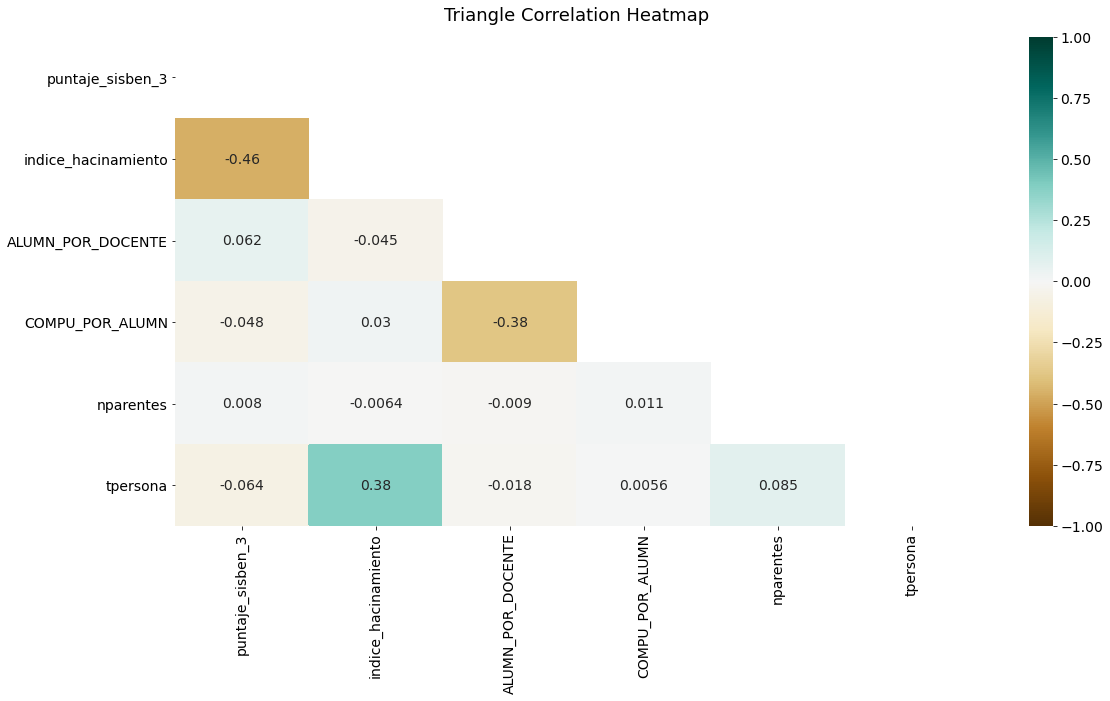

In [60]:
plt.figure(figsize=(18, 9))
# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))
heatmap = sns.heatmap(df[variables].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(df[variables])

,variables,VIF
0,puntaje_sisben_3,8.101627
1,indice_hacinamiento,7.388391
2,ALUMN_POR_DOCENTE,17.285532
3,COMPU_POR_ALUMN,2.934916
4,nparentes,8.756325
5,tpersona,9.545380


In [62]:
aux_multico = []
multi_df = calc_vif(df[variables])
for i in range(len(multi_df)):
    name = multi_df['variables'][i]
    value= multi_df['VIF'][i]
    if value >= 10: # The statndard rule to discard a variable is: VIF >10
        aux_multico.append(name)
variables = list(set(variables) - set(aux_multico))

In [63]:
variables

['puntaje_sisben_3',
 'indice_hacinamiento',
 'COMPU_POR_ALUMN',
 'tpersona',
 'nparentes']

## Number V: Independence of Observations for categorical Data (since continuous ones were treated already)
In this case the more appropiate thing to do is run a Chi-Squared test between all the categorical predictores and see which pairs are plausible.

In [64]:
def puntaje(x , categorias):
    pun= 0
    for i in categorias:
        crosstab = pd.crosstab(x, df[i])
        chi2, p, dof, ex = stats.chi2_contingency(crosstab)
        if p > 0.05:
            pun += 1
    return pun

In [65]:
independent = pd.DataFrame(columns = ['Category', 'counts'])
cats = categorias
counts = []
for j in categorias:
    counts.append(puntaje(df[j], categorias));
   
independent['Category'] = categorias
independent['counts'] = counts
independent = independent.sort_values(by = 'counts', ascending = False)
independent

,Category,counts
0,GENERO,3
1,POB_VICT_CONF,2
2,TIPO_DISCAPACIDAD,2
9,ES_BILINGUE,2
5,todos_servicios_Pub,1
3,CODIGO_JORNADA,0
4,DIR_NUM_LOCALIDAD,0
6,teneviv,0
7,computador,0
8,tiene_auto,0


In [66]:
independent['Below'] = independent['Category'].shift(-1)
independent

,Category,counts,Below
0,GENERO,3,POB_VICT_CONF
1,POB_VICT_CONF,2,TIPO_DISCAPACIDAD
2,TIPO_DISCAPACIDAD,2,ES_BILINGUE
9,ES_BILINGUE,2,todos_servicios_Pub
5,todos_servicios_Pub,1,CODIGO_JORNADA
3,CODIGO_JORNADA,0,DIR_NUM_LOCALIDAD
4,DIR_NUM_LOCALIDAD,0,teneviv
6,teneviv,0,computador
7,computador,0,tiene_auto
8,tiene_auto,0,NaN


In [67]:
independent = independent.reset_index()

In [68]:
vals = []
for i in range(len(independent['Category'])-1):
    crosstab = pd.crosstab(df[independent['Category'][i]], df[independent['Below'][i]])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    vals.append(p)    

In [69]:
vals.append(1)

In [70]:
independent['p_values'] = vals

In [71]:
independent

,index,Category,counts,Below,p_values
0,0,GENERO,3,POB_VICT_CONF,1.451542e-01
1,1,POB_VICT_CONF,2,TIPO_DISCAPACIDAD,6.976600e-01
2,2,TIPO_DISCAPACIDAD,2,ES_BILINGUE,3.363070e-01
3,9,ES_BILINGUE,2,todos_servicios_Pub,5.782524e-24
4,5,todos_servicios_Pub,1,CODIGO_JORNADA,4.153612e-15
5,3,CODIGO_JORNADA,0,DIR_NUM_LOCALIDAD,0.000000e+00
6,4,DIR_NUM_LOCALIDAD,0,teneviv,0.000000e+00
7,6,teneviv,0,computador,0.000000e+00
8,7,computador,0,tiene_auto,0.000000e+00
9,8,tiene_auto,0,NaN,1.000000e+00


In [72]:
cat_iid = []
for i in range(independent.shape[0]):
    cat_iid.append(independent['Category'][i])
    if independent['p_values'][i] <= 0.05:
        print(i)
        break

3


In [73]:
cat_iid

['GENERO', 'POB_VICT_CONF', 'TIPO_DISCAPACIDAD', 'ES_BILINGUE']

#### These 3 lines are just a reminder of the variables taking into account

In [74]:
categorias = cat_iid

In [75]:
variables = conti

In [76]:
variables = list(set(variables) - set(aux_multico))

In [77]:
variables

['puntaje_sisben_3',
 'indice_hacinamiento',
 'COMPU_POR_ALUMN',
 'tpersona',
 'nparentes']

In [78]:
categorias

['GENERO', 'POB_VICT_CONF', 'TIPO_DISCAPACIDAD', 'ES_BILINGUE']

------------------

# Run Models

In [79]:
# def formula_maker(dependiente, variables, categorias):
#     formula = f'{dependiente} ~ '
#     for variable in variables:
#         if formula != f'{dependiente} ~ ':
#             formula += ' + '
#         formula += f'{variable}'
#     for categoria in categorias:
#         if formula != f'{dependiente} ~ ':
#             formula += ' + '
#         formula += f'C({categoria})'
#     return formula  

In [80]:
# formula

In [81]:
# formula=formula_maker('REPITENTE', variables, categorias)
# model= smf.logit(formula= formula, data= df).fit() # Add if method='bfgs' if singular Matrix appears
# model.summary()

In [82]:
# formula=formula_maker('REPITENTE', variables, categorias)
# model= smf.logit(formula= formula, data= df).fit(method = 'bfgs') # Add if method='bfgs' if singular Matrix appears
# model.summary()

## Model with selected variables

In [83]:
all_vars = variables + categorias
y1 = df['REPITENTE']
X1 = df[all_vars]

X_cons1 = sm.add_constant(X1, prepend=False)
X_cons1 = pd.get_dummies(X_cons1, columns=categorias, drop_first=True)
X_cons1.head(2)

,puntaje_sisben_3,indice_hacinamiento,COMPU_POR_ALUMN,tpersona,nparentes,const,GENERO_1,POB_VICT_CONF_1,TIPO_DISCAPACIDAD_1,ES_BILINGUE_1
1,29.440001,2.5,0.568627,5,3,1.0,0,0,0,0
16,30.910000,5.0,0.568627,5,3,1.0,0,0,0,0


In [84]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_cons1, y1, test_size=0.3)

In [85]:
model_1 = sm.GLM(y_train1, X_train1, family=sm.families.Binomial()).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               125556
Model:                            GLM   Df Residuals:                   125546
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26170.
Date:                Wed, 06 Jul 2022   Deviance:                       52340.
Time:                        23:59:25   Pearson chi2:                 1.25e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
puntaje_sisben_3       -0.0065      0.001     -7.446      0.000      -0.008      -0.005
indice_hacinamiento     0.0022      0.011      0.192      0.847      -0.020       0.024
COMPU_POR_ALUMN        -0.1275      0.100     -1.272      0.203      -0.324       0.069
tpersona                0.0265      0.007      3.575      0.000       0.012       0.041
nparentes               0.0184      0.011      1.730      0.084      -0.002       0.039
const                  -2.9364      0.071    -41.284      0.000      -3.076      -2.797
GENERO_1                0.2845      0.025     11.248      0.000       0.235       0.334
POB_VICT_CONF_1         0.1602      0.060      2.653      0.008       0.042       0.279
TIPO_DISCAPACIDAD_1    -0.2834      0.087     -3.273      0.001      -0.453      -0.114
ES_BILINGUE_1           0.3352      0.065      5.181      0.000       0.208       0.462
=======================================================================================
"""

### Threshold selection

[Reference](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

In [86]:
y_probs1 = model_1.predict(X_test1)

fpr, tpr, thresholds = roc_curve(y_test1, y_probs1)
gmeans = np.sqrt(tpr * (1-fpr))

ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]

Best Threshold=0.054436, G-Mean=0.548


In [87]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [88]:
y_predict1 = y_probs1.apply(classi)

In [89]:
y_predict1.value_counts()

0    30442
1    23368
dtype: int64

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1, y_predict1)
print(confusion_matrix)

[[29028 21797]
 [ 1414  1571]]


<AxesSubplot:>

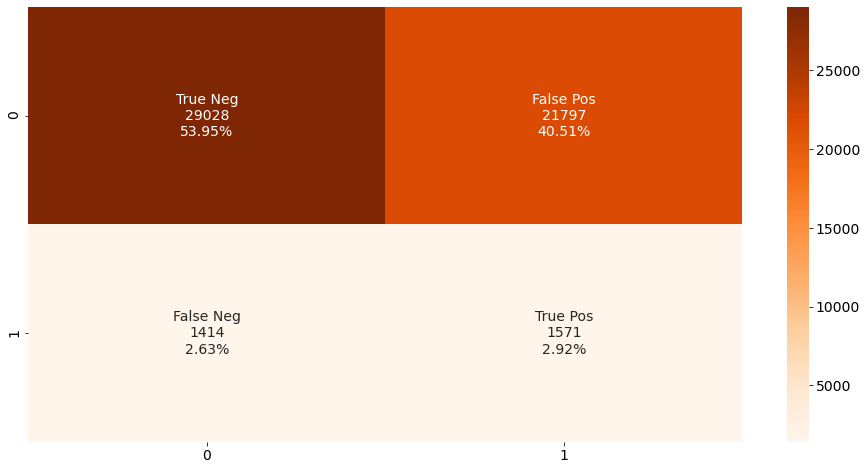

In [91]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_predict1))

              precision    recall  f1-score   support

           0       0.95      0.57      0.71     50825
           1       0.07      0.53      0.12      2985

    accuracy                           0.57     53810
   macro avg       0.51      0.55      0.42     53810
weighted avg       0.90      0.57      0.68     53810



## Model with weights

In [93]:
w = (df['REPITENTE'].value_counts()/ df.shape[0])[0]

In [94]:
def pesos(x):
    if x == 1:
        peso = w
    else:
        peso = 1-w
    return peso

In [95]:
all_vars = variables + categorias
y2 = df['REPITENTE']
X2 = df[all_vars]

X_cons2 = sm.add_constant(X2, prepend=False)
X_cons2 = pd.get_dummies(X_cons2, columns=categorias, drop_first=True)
X_cons2.head(2)

,puntaje_sisben_3,indice_hacinamiento,COMPU_POR_ALUMN,tpersona,nparentes,const,GENERO_1,POB_VICT_CONF_1,TIPO_DISCAPACIDAD_1,ES_BILINGUE_1
1,29.440001,2.5,0.568627,5,3,1.0,0,0,0,0
16,30.910000,5.0,0.568627,5,3,1.0,0,0,0,0


In [96]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_cons2, y2, test_size=0.3)

In [97]:
pesos = y_train2.apply(pesos)

In [98]:
modelo_pesos = sm.GLM(y_train2, X_train2, family=sm.families.Binomial(), freq_weights=pesos).fit()
modelo_pesos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               125556
Model:                            GLM   Df Residuals:                 12927.60
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8893.8
Date:                Wed, 06 Jul 2022   Deviance:                       17788.
Time:                        23:59:27   Pearson chi2:                 1.29e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
puntaje_sisben_3       -0.0065      0.001     -5.325      0.000      -0.009      -0.004
indice_hacinamiento     0.0185      0.016      1.160      0.246      -0.013       0.050
COMPU_POR_ALUMN        -0.0726      0.144     -0.506      0.613      -0.354       0.209
tpersona                0.0228      0.011      2.085      0.037       0.001       0.044
nparentes               0.0169      0.016      1.058      0.290      -0.014       0.048
const                  -0.1045      0.102     -1.025      0.305      -0.304       0.095
GENERO_1                0.2999      0.036      8.445      0.000       0.230       0.370
POB_VICT_CONF_1         0.1975      0.088      2.236      0.025       0.024       0.371
TIPO_DISCAPACIDAD_1    -0.2751      0.116     -2.373      0.018      -0.502      -0.048
ES_BILINGUE_1           0.3650      0.098      3.728      0.000       0.173       0.557
=======================================================================================
"""

In [99]:
y_probs2 = modelo_pesos.predict(X_test2)

fpr, tpr, thresholds = roc_curve(y_test2, y_probs2)
gmeans = np.sqrt(tpr * (1-fpr))

ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]


Best Threshold=0.497985, G-Mean=0.537


In [100]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [101]:
y_predict2 = y_probs2.apply(classi)

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test2, y_predict2)
print(confusion_matrix)

[[26458 24484]
 [ 1277  1591]]


<AxesSubplot:>

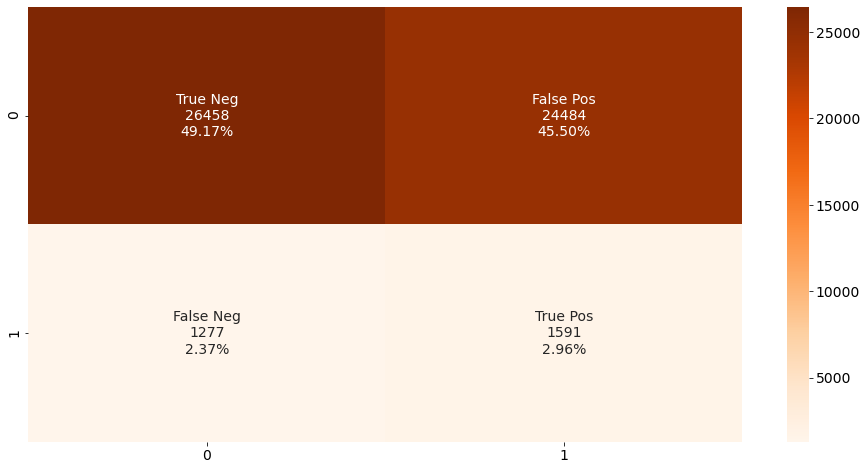

In [103]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_predict2))

              precision    recall  f1-score   support

           0       0.95      0.52      0.67     50942
           1       0.06      0.55      0.11      2868

    accuracy                           0.52     53810
   macro avg       0.51      0.54      0.39     53810
weighted avg       0.91      0.52      0.64     53810



## Model with balanced dataset

In [105]:
df_repitentes = df[df['REPITENTE'] == 1]
df_no_repitentes = df[df['REPITENTE'] == 0].sample(n=df_repitentes.shape[0], random_state=145)
df_consolidado_frac = pd.concat([df_no_repitentes, df_repitentes])

In [106]:
all_vars = variables + categorias
y = df_consolidado_frac['REPITENTE']
X = df_consolidado_frac[all_vars]

X_cons = sm.add_constant(X, prepend=False)
X_cons = pd.get_dummies(X_cons, columns=categorias, drop_first=True)
X_cons.head(2)

,puntaje_sisben_3,indice_hacinamiento,COMPU_POR_ALUMN,tpersona,nparentes,const,GENERO_1,POB_VICT_CONF_1,TIPO_DISCAPACIDAD_1,ES_BILINGUE_1
106727,36.490002,1.5,0.063291,3,3,1.0,1,0,0,0
30949,14.200000,5.0,0.372131,5,3,1.0,0,0,0,0


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cons, y, test_size=0.3)

In [108]:
y_train.value_counts()

0    6852
1    6778
Name: REPITENTE, dtype: int64

In [109]:
modelo_balanceado = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
modelo_balanceado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                13630
Model:                            GLM   Df Residuals:                    13620
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9369.9
Date:                Wed, 06 Jul 2022   Deviance:                       18740.
Time:                        23:59:28   Pearson chi2:                 1.36e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
puntaje_sisben_3       -0.0078      0.001     -6.488      0.000      -0.010      -0.005
indice_hacinamiento     0.0062      0.016      0.400      0.689      -0.024       0.037
COMPU_POR_ALUMN        -0.2015      0.144     -1.404      0.160      -0.483       0.080
tpersona                0.0237      0.010      2.258      0.024       0.003       0.044
nparentes               0.0151      0.015      0.994      0.320      -0.015       0.045
const                  -0.0003      0.098     -0.003      0.998      -0.193       0.193
GENERO_1                0.2606      0.035      7.524      0.000       0.193       0.328
POB_VICT_CONF_1         0.2316      0.087      2.649      0.008       0.060       0.403
TIPO_DISCAPACIDAD_1    -0.2333      0.112     -2.075      0.038      -0.454      -0.013
ES_BILINGUE_1           0.4690      0.096      4.897      0.000       0.281       0.657
=======================================================================================
"""

In [110]:
y_probs = modelo_balanceado.predict(X_test)

# Calculates different FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Take geometric mean as criteria for determining Threeshold
gmeans = np.sqrt(tpr * (1-fpr))

# Get maximun value
ix = np.argmax(gmeans)


print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# Set the threshold
umbral = thresholds[ix]

Best Threshold=0.498785, G-Mean=0.539


In [111]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [112]:
y_predict = y_probs.apply(classi)

In [113]:
# Interesting graphs to explore
# sns.scatterplot(X_test['indice_hacinamiento'], y_probs)

In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[1671 1213]
 [1477 1481]]


<AxesSubplot:>

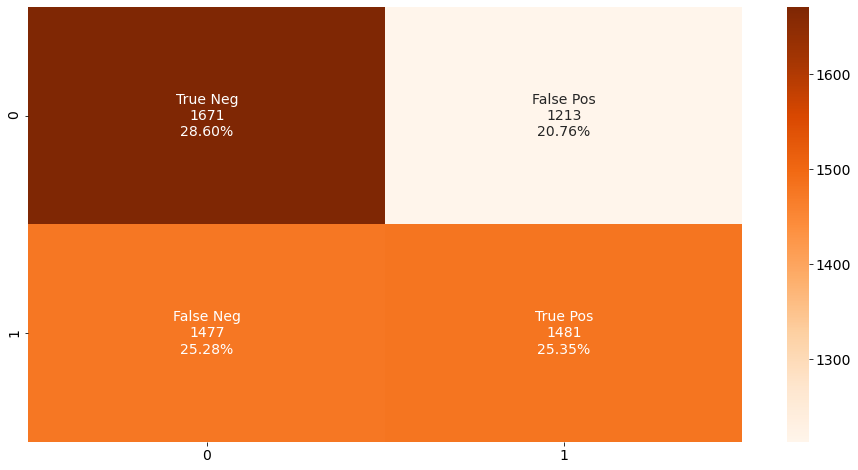

In [115]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.53      0.58      0.55      2884
           1       0.55      0.50      0.52      2958

    accuracy                           0.54      5842
   macro avg       0.54      0.54      0.54      5842
weighted avg       0.54      0.54      0.54      5842



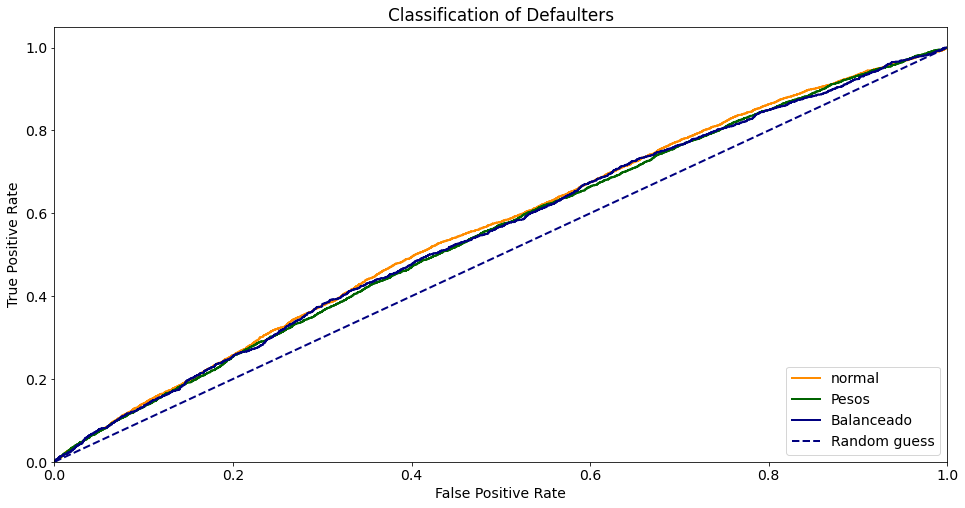

In [117]:
predict_p = model_1.predict(X_test1)
predict_2_p = modelo_pesos.predict(X_test2)
predict_3_p = modelo_balanceado.predict(X_test)

roc_p = roc_curve(y_test1, predict_p)
roc_2_p = roc_curve(y_test2, predict_2_p)
roc_3_p = roc_curve(y_test, predict_3_p)

plt.figure()
line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange',
         lw=line_width, label=f'normal')
plt.plot(roc_2_p[0], roc_2_p[1], color='darkgreen',
         lw=line_width, label=f'Pesos')
plt.plot(roc_3_p[0], roc_3_p[1], color='navy',
         lw=line_width, label=f'Balanceado')

plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Defaulters')
plt.legend(loc='lower right')
plt.show()

In [118]:

auc_p = auc( roc_p[0], roc_p[1] )
auc_2_p = auc( roc_2_p[0], roc_2_p[1] )
auc_3_p = auc(roc_3_p[0], roc_3_p[1])

print('AUC of Normal: ', auc_p)
print('AUC of the model pesos ', auc_2_p)
print('AUC of the model balanceado ', auc_3_p)

AUC of Normal:  0.560514525406175
AUC of the model pesos  0.5507678982091757
AUC of the model balanceado  0.5526757991445658


## Model selection based on AUC scores

**Select the model with biggest AUC score**



In [119]:
AUC_scores =[auc_p, auc_2_p, auc_3_p]

In [120]:
indice_max_models = np.argmax(AUC_scores)

In [121]:
if indice_max_models == 0:
    print('Best model is Regresion Logistica Simple')
elif indice_max_models == 1:
    print('Best model is Regresion Logistica con Pesos')
else:
    print('Best model is Regresion Logistica Balanceada')

Best model is Regresion Logistica Simple


**Below we can see the variables that were take into account when running the previous models**

In [122]:
variables

['puntaje_sisben_3',
 'indice_hacinamiento',
 'COMPU_POR_ALUMN',
 'tpersona',
 'nparentes']

In [123]:
categorias

['GENERO', 'POB_VICT_CONF', 'TIPO_DISCAPACIDAD', 'ES_BILINGUE']

-------------------------------------

# Dash tables

In [124]:
indice_max_models

0

In [125]:
def aux_is_m(n):
    if n-1 == indice_max_models:
        val = 'Si'
    else:
        val = 'No'
    return val

In [126]:
tab1 =  model_1.params.to_frame().reset_index()
tab2 = modelo_pesos.params.to_frame().reset_index()
tab3 = modelo_balanceado.params.to_frame().reset_index()

tab = pd.concat([tab1,tab2,tab3], axis = 0)
tab = tab.reset_index()
tab.drop('level_0', inplace = True, axis = 1)
tab.rename(columns = {'index': 'variable'}, inplace = True)
tab.rename(columns = {0: 'coeff'}, inplace = True)

p1 = model_1.pvalues.to_frame().reset_index()
p2 = modelo_pesos.pvalues.to_frame().reset_index()
p3 = modelo_balanceado.pvalues.to_frame().reset_index()

pvals = pd.concat([p1,p2,p3], axis = 0)
pvals = pvals.reset_index()

pvals.drop('level_0', inplace = True, axis = 1)
pvals.drop('index', inplace = True, axis = 1)
pvals.rename(columns = {0: 'significative'}, inplace = True)
tab = pd.concat([tab,pvals], axis = 1)


tab['Anno'] = 2019
tab['nivel'] = 'Secundaria'

m1 = ['Regresion Logistica Simple']*tab1.shape[0]
m1 = pd.Series(m1)

m2 = ['Regresión Logistica con Pesos']*tab2.shape[0]
m2 =  pd.Series(m2 , index = [i for i in range(tab1.shape[0] , tab1.shape[0]+tab2.shape[0] )])

m3 = ['Regresión Logistica Balanceada']*tab3.shape[0]
m3 = pd.Series(m3 , index = [i for i in range(tab1.shape[0] + tab2.shape[0], tab1.shape[0]+tab2.shape[0] + tab3.shape[0])])

m = pd.concat([m1,m2,m3], axis = 0)

tab['model'] = m

is_m1 =[aux_is_m(1)]*tab1.shape[0]
is_m1 = pd.Series(is_m1)

is_m2 = [aux_is_m(2)]*tab2.shape[0]
is_m2 =  pd.Series(is_m2 , index = [i for i in range(tab1.shape[0] , tab1.shape[0]+tab2.shape[0] )])

is_m3 = [aux_is_m(3)]*tab3.shape[0]
is_m3 = pd.Series(is_m3 , index = [i for i in range(tab1.shape[0] + tab2.shape[0], tab1.shape[0]+tab2.shape[0] + tab3.shape[0])])

is_m = pd.concat([is_m1,is_m2,is_m3], axis = 0)
tab['is_final_model'] = is_m
tab


,variable,coeff,significative,Anno,nivel,model,is_final_model
0,puntaje_sisben_3,-0.006485,9.651455e-14,2019,Secundaria,Regresion Logistica Simple,Si
1,indice_hacinamiento,0.002154,8.473583e-01,2019,Secundaria,Regresion Logistica Simple,Si
2,COMPU_POR_ALUMN,-0.127450,2.033335e-01,2019,Secundaria,Regresion Logistica Simple,Si
3,tpersona,0.026478,3.502356e-04,2019,Secundaria,Regresion Logistica Simple,Si
4,nparentes,0.018429,8.365887e-02,2019,Secundaria,Regresion Logistica Simple,Si
5,const,-2.936371,0.000000e+00,2019,Secundaria,Regresion Logistica Simple,Si
6,GENERO_1,0.284510,2.377624e-29,2019,Secundaria,Regresion Logistica Simple,Si
7,POB_VICT_CONF_1,0.160212,7.981489e-03,2019,Secundaria,Regresion Logistica Simple,Si
8,TIPO_DISCAPACIDAD_1,-0.283445,1.062463e-03,2019,Secundaria,Regresion Logistica Simple,Si
9,ES_BILINGUE_1,0.335236,2.202134e-07,2019,Secundaria,Regresion Logistica Simple,Si


In [127]:
def aux_sig(x):
    if x < 0.05:
        val = 'Si'
    else:
        val = 'No'
    return val

In [128]:
tab['significative'] = tab['significative'].apply(aux_sig )

In [133]:
tab

,variable,coeff,significative,Anno,nivel,model,is_final_model
0,puntaje_sisben_3,-0.006485,Si,2019,Secundaria,Regresion Logistica Simple,Si
1,indice_hacinamiento,0.002154,No,2019,Secundaria,Regresion Logistica Simple,Si
2,COMPU_POR_ALUMN,-0.127450,No,2019,Secundaria,Regresion Logistica Simple,Si
3,tpersona,0.026478,Si,2019,Secundaria,Regresion Logistica Simple,Si
4,nparentes,0.018429,No,2019,Secundaria,Regresion Logistica Simple,Si
5,const,-2.936371,Si,2019,Secundaria,Regresion Logistica Simple,Si
6,GENERO_1,0.284510,Si,2019,Secundaria,Regresion Logistica Simple,Si
7,POB_VICT_CONF_1,0.160212,Si,2019,Secundaria,Regresion Logistica Simple,Si
8,TIPO_DISCAPACIDAD_1,-0.283445,Si,2019,Secundaria,Regresion Logistica Simple,Si
9,ES_BILINGUE_1,0.335236,Si,2019,Secundaria,Regresion Logistica Simple,Si


In [134]:
tab.to_csv('../data/3-oro/t20s.csv')

In [130]:
# Modelo con pesos
modelo_pesos.params.to_frame().reset_index()

,index,0
0,puntaje_sisben_3,-0.006544
1,indice_hacinamiento,0.018479
2,COMPU_POR_ALUMN,-0.072628
3,tpersona,0.022770
4,nparentes,0.016911
5,const,-0.104531
6,GENERO_1,0.299919
7,POB_VICT_CONF_1,0.197461
8,TIPO_DISCAPACIDAD_1,-0.275058
9,ES_BILINGUE_1,0.365036


In [131]:
# Modelo Balanceado
modelo_balanceado.params.to_frame().reset_index()

,index,0
0,puntaje_sisben_3,-0.007752
1,indice_hacinamiento,0.006216
2,COMPU_POR_ALUMN,-0.201490
3,tpersona,0.023667
4,nparentes,0.015076
5,const,-0.000260
6,GENERO_1,0.260595
7,POB_VICT_CONF_1,0.231604
8,TIPO_DISCAPACIDAD_1,-0.233276
9,ES_BILINGUE_1,0.469009


In [132]:
dict_fallo = {'f':0 'f'}

SyntaxError: invalid syntax (<ipython-input-132-c62b09edfb16>, line 1)

-----------------------------

# Models with all variables

### Model with all variables + Constant

In [135]:
variables = ['EDAD',
             'estrato',
             'puntaje_sisben_3',
             'indice_hacinamiento', #-> solo si no se pone nivel_hacinamiento en Categoria
             'TOTAL_EQUIPO_COMPUTO',
             'ALUMN_POR_DOCENTE',
             'COMPU_POR_ALUMN',
             'TOTAL_DOCENTES_CON_TITULO',
             'PROP_DOCENTES_CON_TITULO', #-> solo si no se incluye TOTAL_DOCENTES_CON_TITULO y TOTAL_ALUM al tiempo
             'promepuntaje',
             'GRADO_OVERAGE',
             #'TOTAL_DOCENTES',
             #'TOTAL_ALUMNOS',
             'nparentes',
             #'tcuartosvi',
             'tpersona'
            ]

categorias= ['GENERO',
             'POB_VICT_CONF',
             'PROVIENE_OTR_MUN',
             'TIPO_DISCAPACIDAD',
             'CODIGO_ETNIA',
             'CODIGO_JORNADA',
             'DIR_NUM_LOCALIDAD',
             'embaraza',
             'todos_servicios_Pub',
             'teneviv',
             'computador',
             'tiene_auto',
             'ES_BILINGUE',
             'CAP_EXC',
             

             ]

In [136]:
all_vars = variables + categorias
y = df['REPITENTE']
X = df[all_vars]

X_cons = sm.add_constant(X, prepend=False)
X_cons = pd.get_dummies(X_cons, columns=categorias, drop_first=True)
X_cons.head(2)

,EDAD,estrato,puntaje_sisben_3,indice_hacinamiento,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,GRADO_OVERAGE,nparentes,tpersona,const,GENERO_1,POB_VICT_CONF_1,PROVIENE_OTR_MUN_1,TIPO_DISCAPACIDAD_1,CODIGO_ETNIA_1,CODIGO_ETNIA_2,CODIGO_ETNIA_3,CODIGO_ETNIA_4,CODIGO_ETNIA_5,CODIGO_JORNADA_2,CODIGO_JORNADA_3,CODIGO_JORNADA_6,DIR_NUM_LOCALIDAD_2,DIR_NUM_LOCALIDAD_3,DIR_NUM_LOCALIDAD_4,DIR_NUM_LOCALIDAD_5,DIR_NUM_LOCALIDAD_6,DIR_NUM_LOCALIDAD_7,DIR_NUM_LOCALIDAD_8,DIR_NUM_LOCALIDAD_9,DIR_NUM_LOCALIDAD_10,DIR_NUM_LOCALIDAD_11,DIR_NUM_LOCALIDAD_12,DIR_NUM_LOCALIDAD_13,DIR_NUM_LOCALIDAD_14,DIR_NUM_LOCALIDAD_15,DIR_NUM_LOCALIDAD_16,DIR_NUM_LOCALIDAD_17,DIR_NUM_LOCALIDAD_18,DIR_NUM_LOCALIDAD_19,DIR_NUM_LOCALIDAD_20,embaraza_1,todos_servicios_Pub_1,teneviv_2,teneviv_3,teneviv_4,computador_1,tiene_auto_1,ES_BILINGUE_1,CAP_EXC_2,CAP_EXC_3,CAP_EXC_4,CAP_EXC_5,CAP_EXC_6,CAP_EXC_7,CAP_EXC_9
1,15,3,29.440001,2.5,319,19.344828,0.568627,28,0.965517,265.478873,0,3,5,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
16,15,3,30.910000,5.0,319,19.344828,0.568627,28,0.965517,265.478873,12,3,5,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [137]:
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_cons, y, test_size=0.3)

In [138]:
model_all = sm.GLM(y_train_all, X_train_all, family=sm.families.Binomial()).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               125556
Model:                            GLM   Df Residuals:                   125496
Model Family:                Binomial   Df Model:                           59
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24466.
Date:                Thu, 07 Jul 2022   Deviance:                       48932.
Time:                        15:31:13   Pearson chi2:                 1.20e+05
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
EDAD                          0.1234      0.010     12.555      0.000       0.104       0.143
estrato                       0.1077      0.024      4.407      0.000       0.060       0.156
puntaje_sisben_3             -0.0028      0.001     -2.918      0.004      -0.005      -0.001
indice_hacinamiento          -0.0009      0.012     -0.075      0.940      -0.024       0.022
TOTAL_EQUIPO_COMPUTO          0.0005      0.000      4.475      0.000       0.000       0.001
ALUMN_POR_DOCENTE             0.0256      0.004      6.926      0.000       0.018       0.033
COMPU_POR_ALUMN               0.0551      0.194      0.284      0.777      -0.325       0.436
TOTAL_DOCENTES_CON_TITULO    -0.0043      0.001     -6.146      0.000      -0.006      -0.003
PROP_DOCENTES_CON_TITULO     -0.2007      0.075     -2.664      0.008      -0.348      -0.053
promepuntaje                 -0.0018      0.001     -1.556      0.120      -0.004       0.000
GRADO_OVERAGE                 0.0613      0.002     33.832      0.000       0.058       0.065
nparentes                     0.0038      0.011      0.332      0.740      -0.019       0.026
tpersona                      0.0137      0.008      1.753      0.080      -0.002       0.029
const                       -27.7567   1.77e+04     -0.002      0.999   -3.46e+04    3.46e+04
GENERO_1                      0.1632      0.026      6.295      0.000       0.112       0.214
POB_VICT_CONF_1               0.0183      0.063      0.291      0.771      -0.105       0.142
PROVIENE_OTR_MUN_1            0.0281      0.122      0.230      0.818      -0.212       0.268
TIPO_DISCAPACIDAD_1          -1.0738      0.092    -11.698      0.000      -1.254      -0.894
CODIGO_ETNIA_1               -0.0646      0.232     -0.279      0.780      -0.519       0.390
CODIGO_ETNIA_2                0.0531      0.188      0.282      0.778      -0.316       0.422
CODIGO_ETNIA_3                2.4183      1.286      1.880      0.060      -0.103       4.940
CODIGO_ETNIA_4               -0.0934      0.734     -0.127      0.899      -1.532       1.345
CODIGO_ETNIA_5                0.3750      0.362      1.037      0.300      -0.334       1.084
CODIGO_JORNADA_2              1.3959      0.276      5.060      0.000       0.855       1.937
CODIGO_JORNADA_3              1.4250      0.276      5.164      0.000       0.884       1.966
CODIGO_JORNADA_6              1.2908      0.277      4.654      0.000       0.747       1.834
DIR_NUM_LOCALIDAD_2           0.6262      0.189      3.305      0.001       0.255       0.998
DIR_NUM_LOCALIDAD_3          -1.2525      0.219     -5.729      0.000      -1.681      -0.824
DIR_NUM_LOCALIDAD_4          -0.0702      0.088     -0.798      0.425      -0.243       0.102
DIR_NUM_LOCALIDAD_5          -0.6769      0.091     -7.431      0.000      

In [139]:
# Gets probabilities
y_probs_all = model_all.predict(X_test_all)

# Get TPR = True positive rate, FPR = False positive Rate and values to compare based on ROC_curves 
fpr, tpr, thresholds = roc_curve(y_test_all, y_probs_all)

# We establish Gmean maximun as criteria for optimazing tradeoff between errors of classification
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)


print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]

Best Threshold=0.052215, G-Mean=0.676


In [140]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [141]:
# We make our predictions based on theorical threshold
y_predict_all = y_probs_all.apply(classi)

In [142]:
# Get confusion matrix = Crosstab table of classifications
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_all, y_predict_all)
print(confusion_matrix)

[[34473 16418]
 [  953  1966]]


<AxesSubplot:>

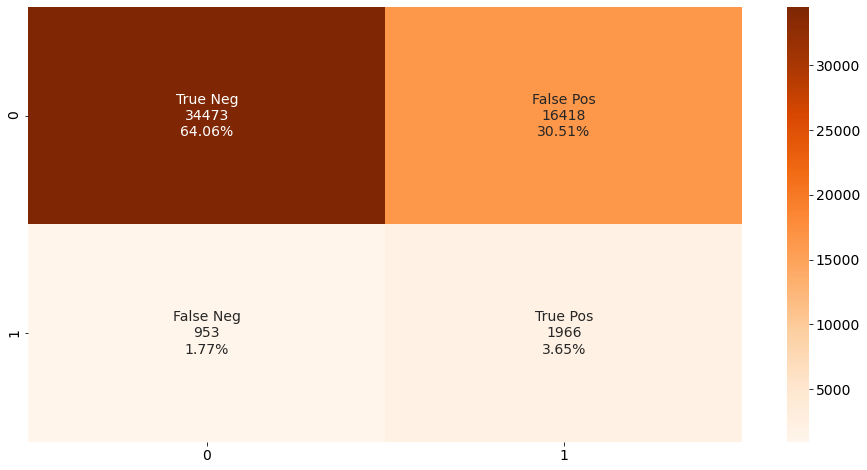

In [143]:
# Auxiliar Graph
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [144]:
# Final report
from sklearn.metrics import classification_report
print(classification_report(y_test_all, y_predict_all))

              precision    recall  f1-score   support

           0       0.97      0.68      0.80     50891
           1       0.11      0.67      0.18      2919

    accuracy                           0.68     53810
   macro avg       0.54      0.68      0.49     53810
weighted avg       0.93      0.68      0.77     53810



----------------------------

### Model with all variables with weights

In [145]:
# We set the value for weights accordingly to distribution of our data
w = (df['REPITENTE'].value_counts()/ df.shape[0])[0]

In [146]:
def pesos(x):
    if x == 1:
        peso = w
    else:
        peso = 1-w
    return peso

In [147]:
all_vars = variables + categorias
y = df['REPITENTE']
X = df[all_vars]

X_cons = sm.add_constant(X, prepend=False)
X_cons = pd.get_dummies(X_cons, columns=categorias, drop_first=True)
X_cons.head(2)

,EDAD,estrato,puntaje_sisben_3,indice_hacinamiento,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,GRADO_OVERAGE,nparentes,tpersona,const,GENERO_1,POB_VICT_CONF_1,PROVIENE_OTR_MUN_1,TIPO_DISCAPACIDAD_1,CODIGO_ETNIA_1,CODIGO_ETNIA_2,CODIGO_ETNIA_3,CODIGO_ETNIA_4,CODIGO_ETNIA_5,CODIGO_JORNADA_2,CODIGO_JORNADA_3,CODIGO_JORNADA_6,DIR_NUM_LOCALIDAD_2,DIR_NUM_LOCALIDAD_3,DIR_NUM_LOCALIDAD_4,DIR_NUM_LOCALIDAD_5,DIR_NUM_LOCALIDAD_6,DIR_NUM_LOCALIDAD_7,DIR_NUM_LOCALIDAD_8,DIR_NUM_LOCALIDAD_9,DIR_NUM_LOCALIDAD_10,DIR_NUM_LOCALIDAD_11,DIR_NUM_LOCALIDAD_12,DIR_NUM_LOCALIDAD_13,DIR_NUM_LOCALIDAD_14,DIR_NUM_LOCALIDAD_15,DIR_NUM_LOCALIDAD_16,DIR_NUM_LOCALIDAD_17,DIR_NUM_LOCALIDAD_18,DIR_NUM_LOCALIDAD_19,DIR_NUM_LOCALIDAD_20,embaraza_1,todos_servicios_Pub_1,teneviv_2,teneviv_3,teneviv_4,computador_1,tiene_auto_1,ES_BILINGUE_1,CAP_EXC_2,CAP_EXC_3,CAP_EXC_4,CAP_EXC_5,CAP_EXC_6,CAP_EXC_7,CAP_EXC_9
1,15,3,29.440001,2.5,319,19.344828,0.568627,28,0.965517,265.478873,0,3,5,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
16,15,3,30.910000,5.0,319,19.344828,0.568627,28,0.965517,265.478873,12,3,5,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [148]:
from sklearn.model_selection import train_test_split
X_train_w_all, X_test_w_all, y_train_w_all, y_test_w_all = train_test_split(X_cons, y, test_size=0.3)

In [149]:
pesos = y_train_w_all.apply(pesos)

In [150]:
model_w_all = sm.GLM(y_train_w_all, X_train_w_all, family=sm.families.Binomial(), 
                     freq_weights=pesos).fit()
model_w_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               125556
Model:                            GLM   Df Residuals:                 12857.99
Model Family:                Binomial   Df Model:                           59
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7907.6
Date:                Thu, 07 Jul 2022   Deviance:                       15815.
Time:                        15:32:31   Pearson chi2:                 1.33e+04
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
EDAD                          0.1892      0.015     12.424      0.000       0.159       0.219
estrato                       0.1168      0.037      3.118      0.002       0.043       0.190
puntaje_sisben_3             -0.0027      0.001     -1.913      0.056      -0.005    6.61e-05
indice_hacinamiento           0.0027      0.018      0.155      0.877      -0.032       0.037
TOTAL_EQUIPO_COMPUTO          0.0003      0.000      1.514      0.130    -8.4e-05       0.001
ALUMN_POR_DOCENTE             0.0304      0.006      5.021      0.000       0.019       0.042
COMPU_POR_ALUMN               0.4855      0.304      1.598      0.110      -0.110       1.081
TOTAL_DOCENTES_CON_TITULO    -0.0031      0.001     -3.073      0.002      -0.005      -0.001
PROP_DOCENTES_CON_TITULO     -0.3569      0.114     -3.118      0.002      -0.581      -0.133
promepuntaje                 -0.0010      0.002     -0.591      0.555      -0.004       0.002
GRADO_OVERAGE                 0.0638      0.003     20.278      0.000       0.058       0.070
nparentes                     0.0137      0.017      0.788      0.431      -0.020       0.048
tpersona                      0.0108      0.012      0.893      0.372      -0.013       0.034
const                       -25.9462   1.74e+04     -0.001      0.999   -3.41e+04    3.41e+04
GENERO_1                      0.2199      0.039      5.705      0.000       0.144       0.295
POB_VICT_CONF_1               0.0773      0.097      0.800      0.424      -0.112       0.267
PROVIENE_OTR_MUN_1            0.0824      0.190      0.434      0.665      -0.290       0.455
TIPO_DISCAPACIDAD_1          -0.8502      0.134     -6.360      0.000      -1.112      -0.588
CODIGO_ETNIA_1                0.0600      0.320      0.188      0.851      -0.567       0.687
CODIGO_ETNIA_2               -0.1187      0.303     -0.391      0.695      -0.713       0.476
CODIGO_ETNIA_3                2.9702      4.417      0.672      0.501      -5.687      11.627
CODIGO_ETNIA_4                0.7368      1.119      0.658      0.510      -1.456       2.930
CODIGO_ETNIA_5                0.0056      0.651      0.009      0.993      -1.271       1.282
CODIGO_JORNADA_2              1.2053      0.306      3.944      0.000       0.606       1.804
CODIGO_JORNADA_3              1.2786      0.306      4.183      0.000       0.680       1.878
CODIGO_JORNADA_6              1.0052      0.308      3.265      0.001       0.402       1.609
DIR_NUM_LOCALIDAD_2           0.8168      0.310      2.637      0.008       0.210       1.424
DIR_NUM_LOCALIDAD_3          -1.6306      0.323     -5.042      0.000      -2.264      -0.997
DIR_NUM_LOCALIDAD_4          -0.1642      0.133     -1.237      0.216      -0.424       0.096
DIR_NUM_LOCALIDAD_5          -0.7259      0.133     -5.458      0.000      

In [151]:
# Get probabilities of our predictions
y_probs_w_all = model_w_all.predict(X_test_w_all)

# Get fpr = False Positive Rate, tpr = True Positive Rate, we get roc curves
fpr, tpr, thresholds = roc_curve(y_test_w_all, y_probs_w_all)

# Optimize based on Gmeans of TPR*((1-FPR)) lower the FPR the better.
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]

Best Threshold=0.489086, G-Mean=0.668


In [152]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [153]:
# Make predictions based on thresholds
y_predict_w_all = y_probs_w_all.apply(classi)

In [154]:
# Get confussion matrix = Crosstab matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_w_all, y_predict_w_all)
print(confusion_matrix)

[[34568 16352]
 [  992  1898]]


<AxesSubplot:>

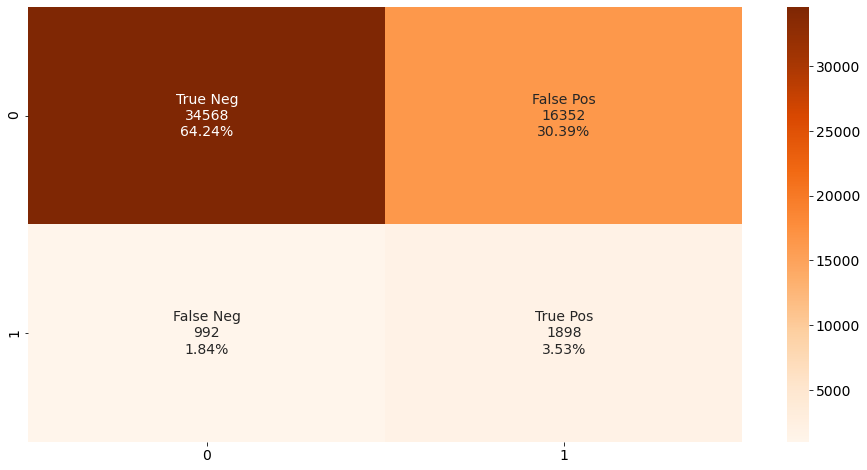

In [155]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [156]:
from sklearn.metrics import classification_report
print(classification_report(y_test_w_all, y_predict_w_all))

              precision    recall  f1-score   support

           0       0.97      0.68      0.80     50920
           1       0.10      0.66      0.18      2890

    accuracy                           0.68     53810
   macro avg       0.54      0.67      0.49     53810
weighted avg       0.93      0.68      0.77     53810



## Model with all variables with balanced dataset

## A brief note on why not to use noramalization techniques

[Why not normalize yout data when fitting Logistic Regression?](https://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression)


[Regularization, standarization, normalization worsen model performance](https://www.turing.com/kb/effects-of-normalization-techniques-on-logistic-regression-in-data-science)

----------------------

### Conclusions